In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import ascii
import matplotlib.colors as mcolors
from numpy.random import multivariate_normal
from scipy import stats
import pandas as pd


Text(0.5, 0, 'Rest-frame Days from g-max')

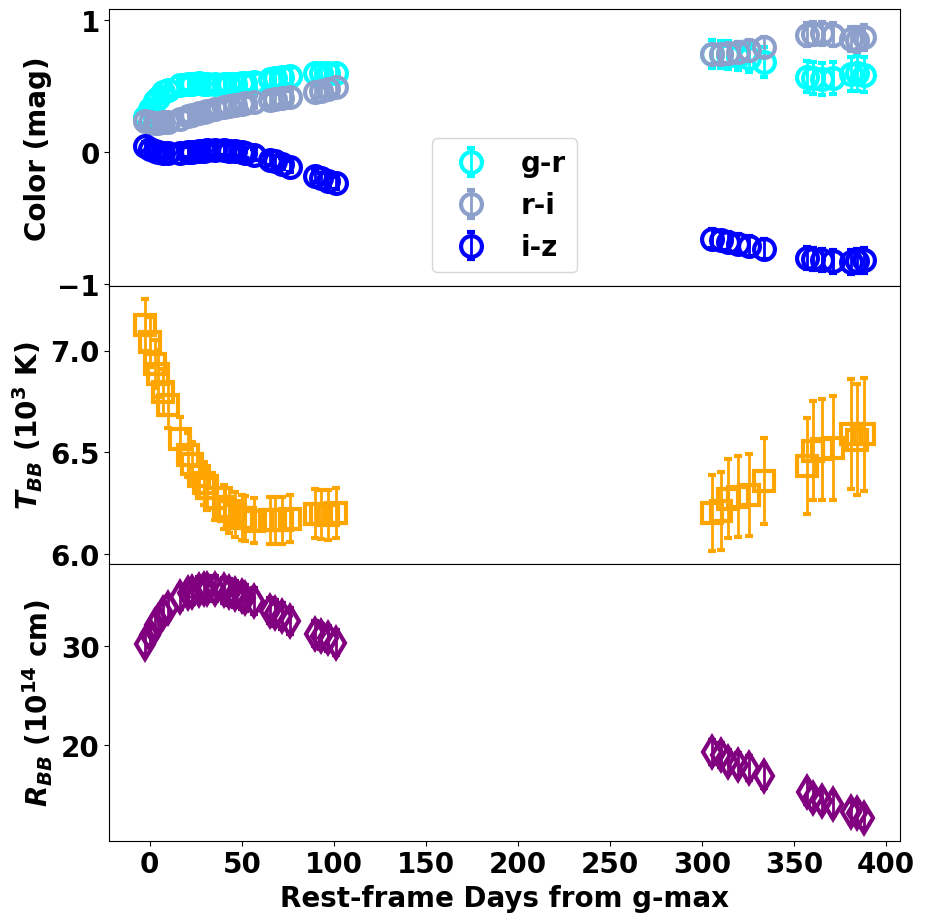

In [2]:
df= pd.read_csv("tempradps11aop.csv") #read in the data
time = df['phase']+0.525965 # + 0.525965 corrects the phase to g-max = 0 time
temp = df['temp']
temperr = df['temperr']
radius = df['radius']
radiuserr = df['radiuserr']
griz= pd.read_csv("griz-colorps11aop.csv")
time_griz = griz['phase']+0.525965
g_f = griz['g']
r_f = griz['r']
i_f = griz['i']
z_f = griz['z']

g_fe = griz['gerr']
r_fe = griz['rerr']
i_fe = griz['ierr']
z_fe = griz['zerr']

g_ab = ((-2.5*np.log10(g_f)) + 27.5)-(3.172*0.0347)
g_error = (2.5*g_fe)/(np.log(10)*g_f)

r_ab = ((-2.5*np.log10(r_f)) + 27.5)-(2.271*0.0347)
r_error = (2.5*r_fe)/(np.log(10)*r_f)

i_ab = ((-2.5*np.log10(i_f)) + 27.5)-(1.682*0.0347)
i_error = (2.5*i_fe)/(np.log(10)*i_f)

z_ab = ((-2.5*np.log10(z_f)) + 27.5)-(1.263*0.0347)
z_error = (2.5*z_fe)/(np.log(10)*z_f)

gr = g_ab - r_ab
ri = r_ab - i_ab
iz = i_ab - z_ab
gr_err = np.sqrt(g_error**2 + r_error**2)
ri_err = np.sqrt(r_error**2 + i_error**2)
iz_err = np.sqrt(i_error**2 + z_error**2)

from matplotlib import rc,rcParams
rc('font', weight='bold')

fig, axs = plt.subplots(3,figsize=(10.20,10.80), sharex=True, sharey=False, gridspec_kw={'hspace': 0})
axs[0].errorbar(time_griz,gr,yerr= gr_err, fmt = 'o',color = 'cyan',markerfacecolor='none', capthick=1,elinewidth=2,capsize=3,markeredgewidth=3,markersize =15,linewidth = 3,label = 'g-r' )
axs[0].errorbar(time_griz,ri,yerr= ri_err, fmt = 'o',color = '#8da0cb',markerfacecolor='none',capthick=1,elinewidth=2,capsize=3, markeredgewidth=3,markersize =15,linewidth = 3,label = 'r-i' )
axs[0].errorbar(time_griz,iz,yerr= iz_err, fmt = 'o',color = 'blue',markerfacecolor='none',capthick=1,elinewidth=2,capsize=3, markeredgewidth=3,markersize =15,linewidth = 3,label = 'i-z' )
axs[0].set_ylabel('Color (mag)', fontsize = 20,fontweight='bold')
axs[0].tick_params(labelsize=20)
axs[0].legend(fontsize =20)

axs[1].errorbar(time, temp/1000,yerr=temperr/1000,fmt= 's',color = 'orange',markerfacecolor='none',capthick=1,elinewidth=2,capsize=3, markeredgewidth=3,markersize =15,linewidth = 3)
axs[1].set_ylabel(r'$T_{BB}$ ($10^{3}$ K)', fontsize = 20,fontweight='bold')
axs[1].tick_params(labelsize=20)

axs[2].errorbar(time, radius,yerr = radiuserr,fmt= 'd',color = 'purple',markerfacecolor='none',capthick=1,elinewidth=2,capsize=3, markeredgewidth=3,markersize =15,linewidth = 3)
axs[2].set_ylabel(r'$R_{BB}$ ($10^{14}$ cm)', fontsize = 20,fontweight='bold')
axs[2].tick_params(labelsize=20)
plt.xlabel('Rest-frame Days from g-max',fontsize =20, fontweight='bold')

#plt.savefig('tempradcolor.png', dpi = 300, transparent = True)



In [5]:
 radius[0:12] , time[0:12]

(0     30.2605
 1     31.1301
 2     32.1312
 3     32.5699
 4     33.3454
 5     33.8431
 6     34.9593
 7     35.3675
 8     35.5476
 9     35.7580
 10    35.8066
 11    35.8401
 Name: radius, dtype: float64,
 0     -2.366145
 1     -0.106953
 2      2.905305
 3      4.411435
 4      7.423695
 5      9.682885
 6     16.460465
 7     20.602365
 8     22.861565
 9     26.626865
 10    29.262565
 11    31.145265
 Name: phase, dtype: float64)

In [4]:
maximum black body radius of 35.8401e14cm at about 30 days after the explosion

3584010000000000.0

In [14]:
g_ab, g_error,# r_ab, r_error, i_ab, i_error, z_ab, z_error
#print(g_ab)
file_out = 'ps11aop-extra.csv'
data = [g_ab,g_error,r_ab,r_error,i_ab,i_error,z_ab,z_error]
names = ['g_ab','g_error','r_ab','r_error','i_ab','i_error','z_ab','z_error']
ascii.write(data,file_out,names=names,overwrite=True,format='csv')